# Pré-processamento dos dados

É de notar que aquilo que é a classificação de uma galáxia está expresso na coluna ```subclass```.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

galaxy_data = pd.read_csv("data.csv", header = 1) # header 1 para ignorar a primeira linha

Retiremos colunas irrelevantes:

In [25]:
del galaxy_data['objid']
del galaxy_data['class'] # sempre GALAXY
del galaxy_data['specobjid']

In [26]:
galaxy_data.describe()

,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,98.845058,175.621855,...,18.834259,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.116753,0.000179
std,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,229.479215,435.852215,...,105.079620,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.100169,0.052189
min,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,-42.440640,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000002
25%,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,...,19.257783,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.055836,0.000008
50%,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,...,19.763915,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.085850,0.000011
75%,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,...,20.408775,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,0.135148,0.000015
max,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,18668.400000,31755.990000,...,26.174400,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,0.572899,16.503710


Podemos constatar que há várias colunas que contêm o valor -9999, o que parece inválido. Eliminemos as linhas onde tal valor figure.

In [27]:
galaxy_data = galaxy_data.loc[~(galaxy_data == -9999).any(axis=1)]
galaxy_data.describe()

,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,...,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000
mean,180.871384,23.408281,19.535651,18.286963,17.653960,17.295507,17.076613,31.280862,100.691635,178.805716,...,19.885111,18.974685,18.686195,0.502952,0.581536,0.593237,0.592267,0.564087,0.113784,0.000183
std,75.521237,21.139379,1.414031,1.467872,1.455235,1.478748,1.515657,77.026785,229.895755,436.330953,...,1.010839,1.047592,1.079401,0.249706,0.231337,0.223864,0.224363,0.236591,0.096034,0.052860
min,0.008745,-11.244273,12.753830,11.822230,11.245440,10.711590,10.255130,-26.503830,-1.549572,-2.374534,...,15.495690,14.730110,14.304590,0.050000,0.050000,0.050000,0.050000,0.050000,-0.000833,0.000002
25%,139.186151,3.096875,18.745285,17.489463,16.882508,16.510883,16.263535,9.974552,36.952790,72.081635,...,19.244823,18.282073,17.977782,0.312424,0.403996,0.422141,0.421844,0.388564,0.055660,0.000008
50%,181.727246,20.678307,19.326030,18.052690,17.441320,17.072225,16.841180,18.602125,60.106555,105.553050,...,19.742110,18.822060,18.537410,0.515580,0.592218,0.607269,0.606766,0.579339,0.085263,0.000010
75%,223.893171,42.135652,20.002553,18.580872,17.855435,17.519850,17.368462,31.759725,100.975275,176.602175,...,20.344170,19.515025,19.235130,0.700799,0.770523,0.775138,0.774166,0.755234,0.132940,0.000015
max,359.997922,68.695258,30.327660,28.207960,28.045800,25.092310,24.140990,7915.306000,18668.400000,31755.990000,...,25.456670,24.362560,23.435990,1.000000,1.000000,0.999999,1.000000,0.999998,0.572899,16.503710


In [28]:
galaxy_data.isna().sum().sum()

0

Constatamos que não existem valores nulos em todo o ficheiro de dados.

In [29]:
galaxy_data.duplicated().any()

False

E, ainda, que não existem linhas duplicadas.

Verifiquemos agora se existem erros ortográficos em alguma das linhas, no campo subclasse.

In [30]:
galaxy_data['subclass'].unique()

array(['STARFORMING', 'STARBURST'], dtype=object)

ra


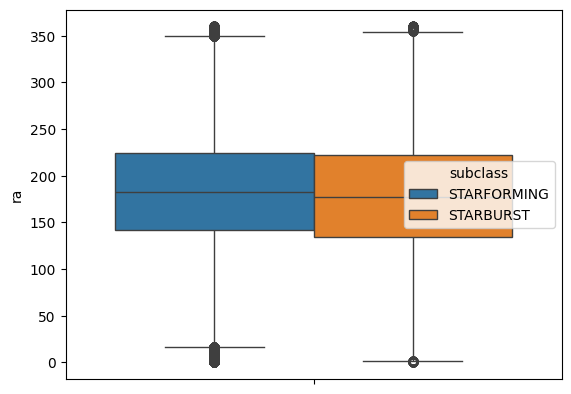

dec


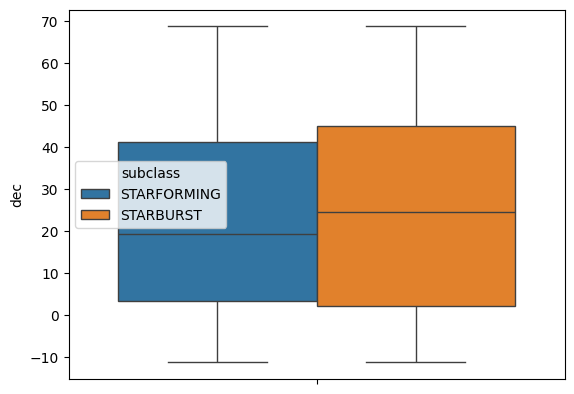

u


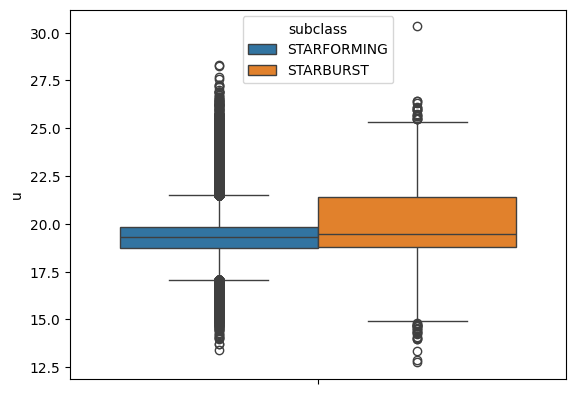

g


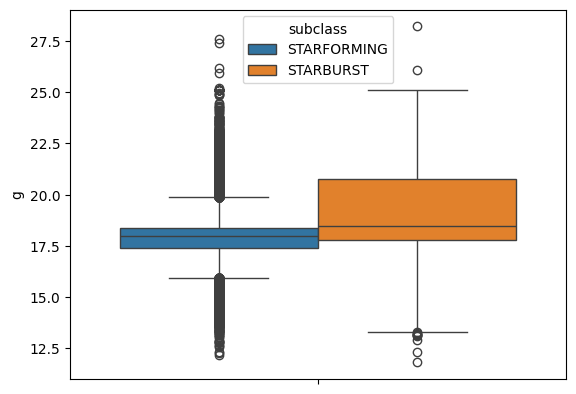

r


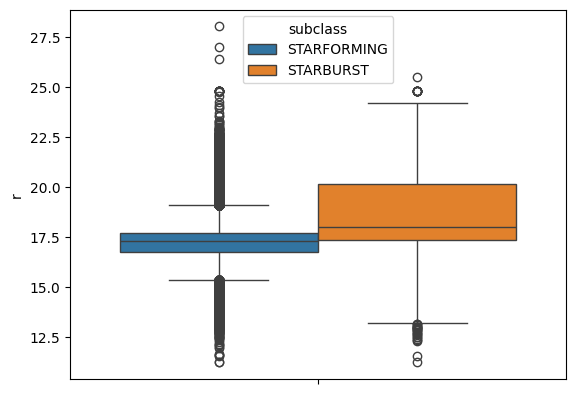

i


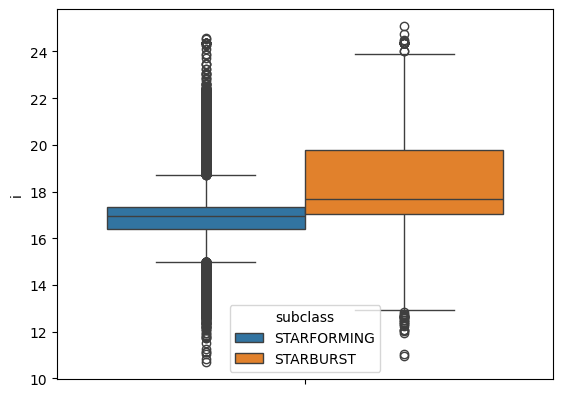

z


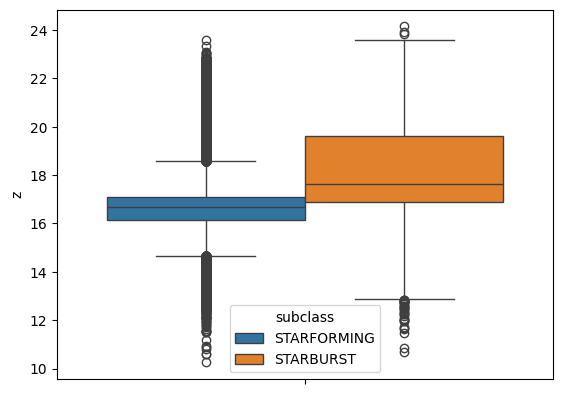

modelFlux_u


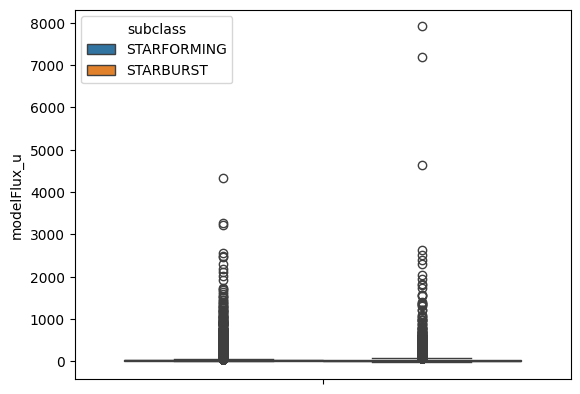

modelFlux_g


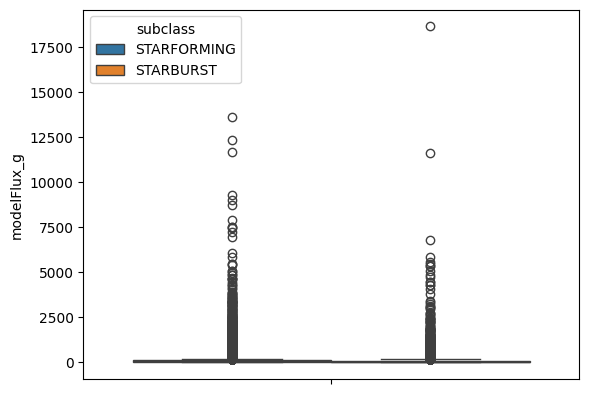

modelFlux_r


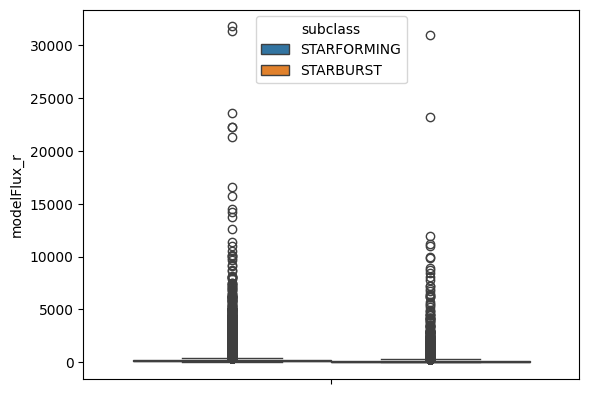

modelFlux_i


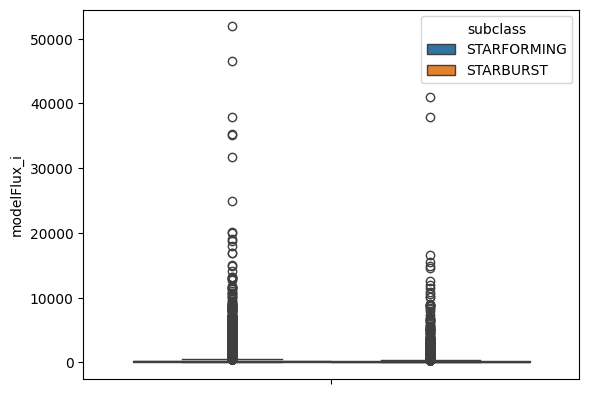

modelFlux_z


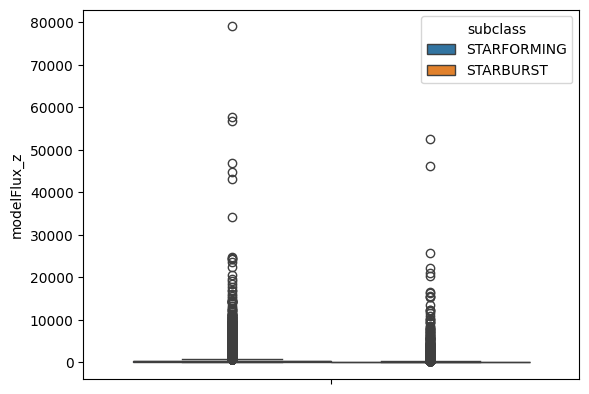

petroRad_u


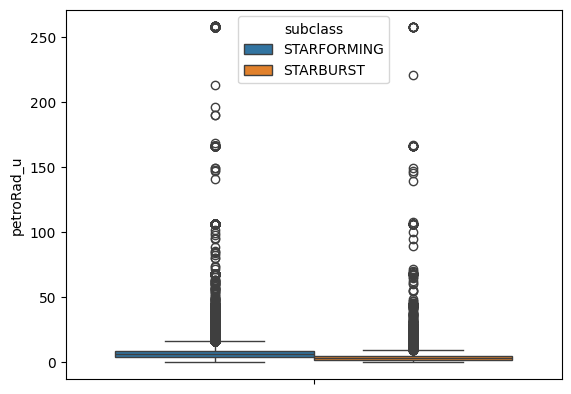

petroRad_g


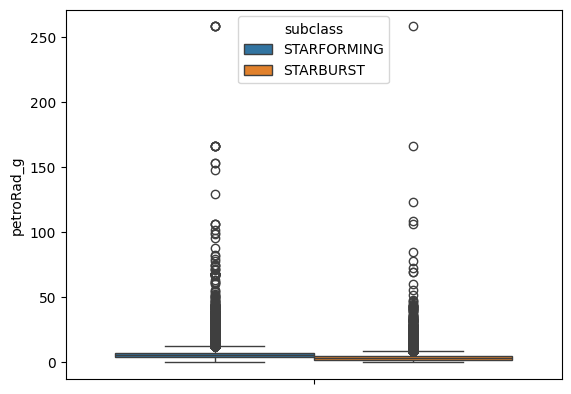

petroRad_i


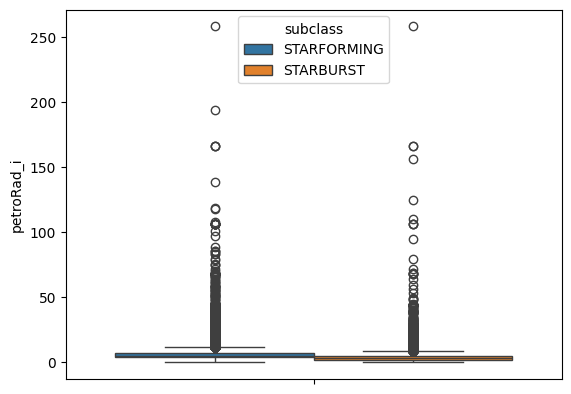

petroRad_r


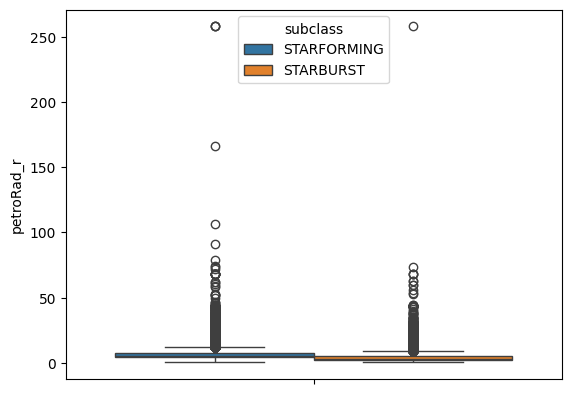

petroRad_z


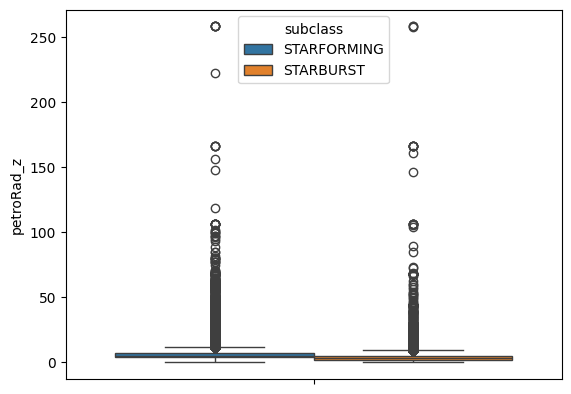

petroFlux_u


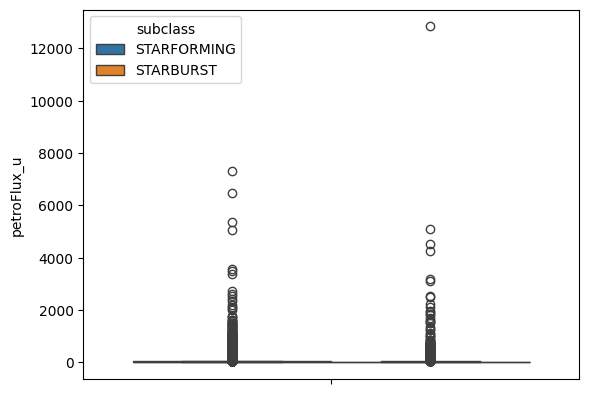

petroFlux_g


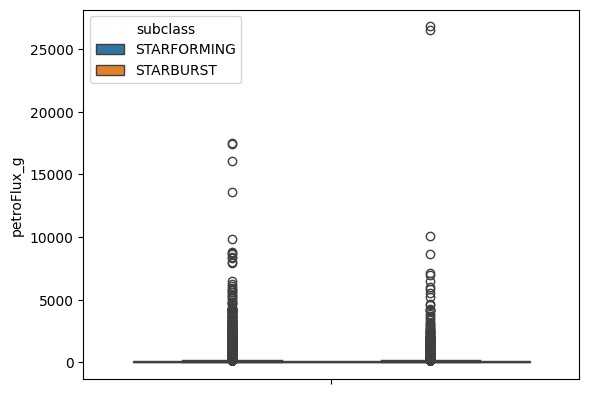

petroFlux_i


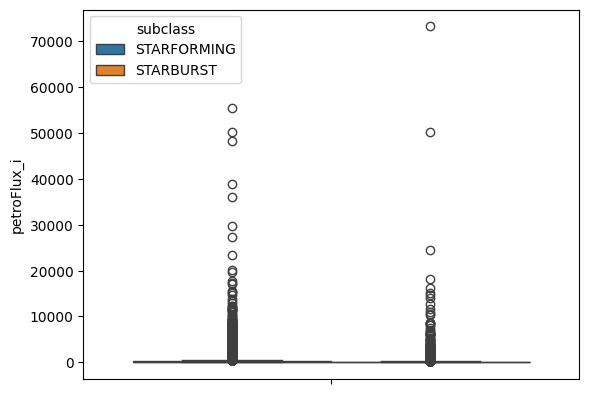

petroFlux_r


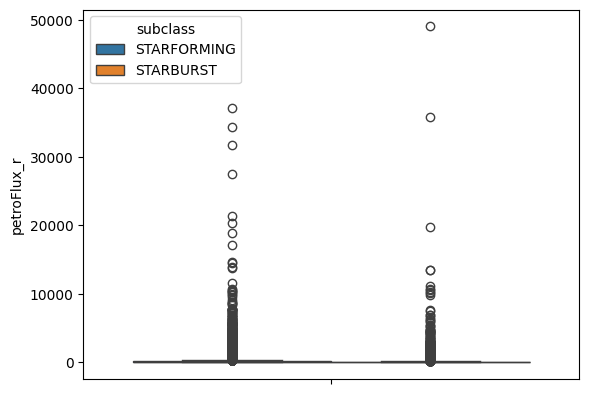

petroFlux_z


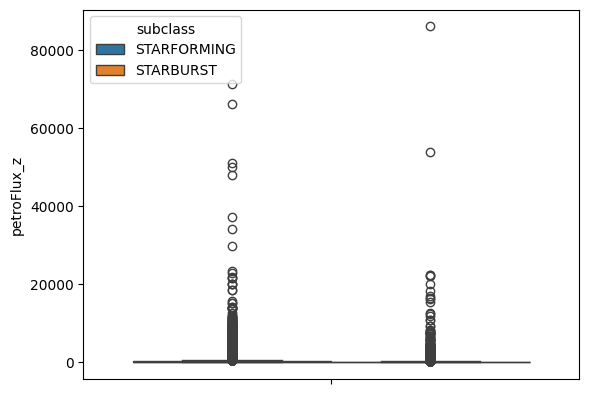

petroR50_u


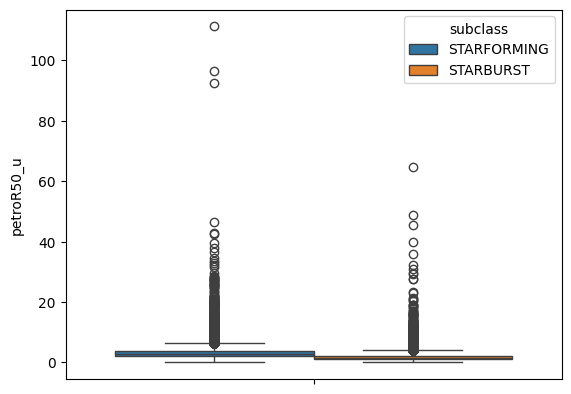

petroR50_g


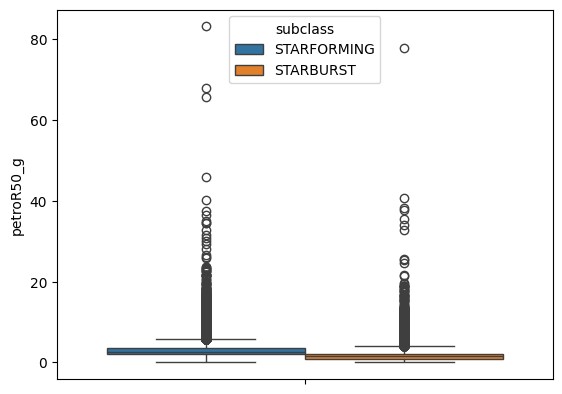

petroR50_i


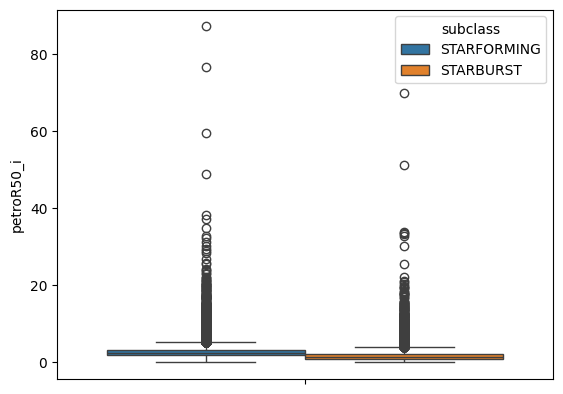

petroR50_r


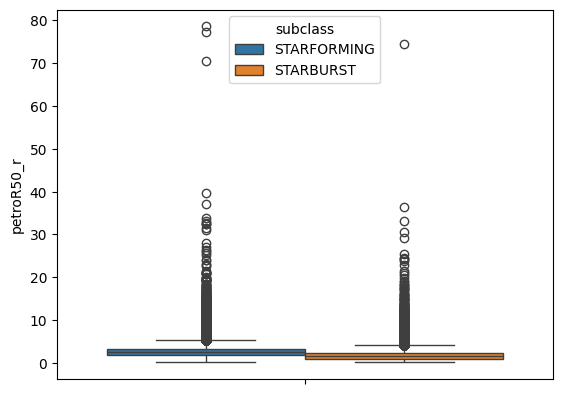

petroR50_z


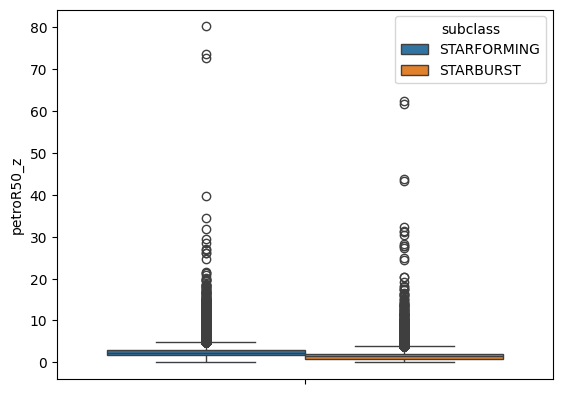

psfMag_u


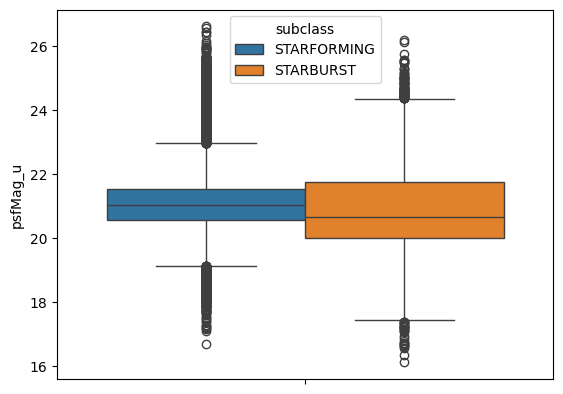

psfMag_r


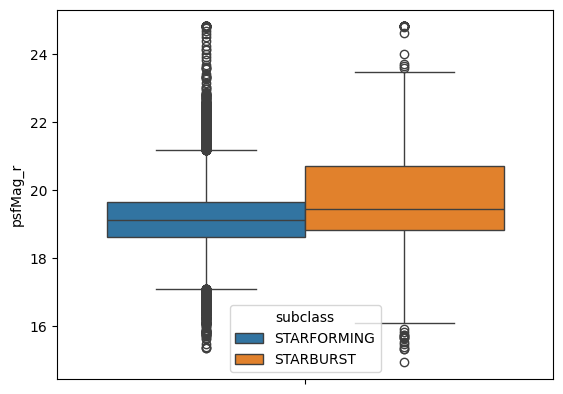

psfMag_g


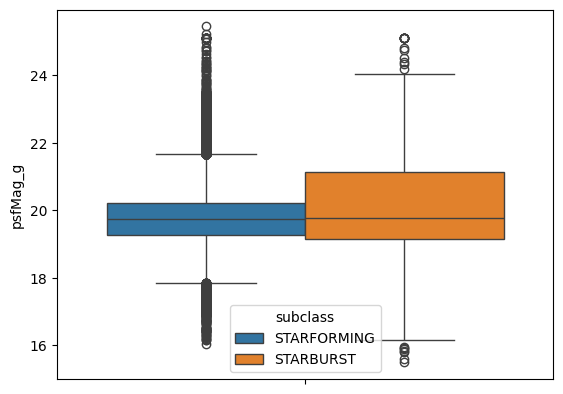

psfMag_i


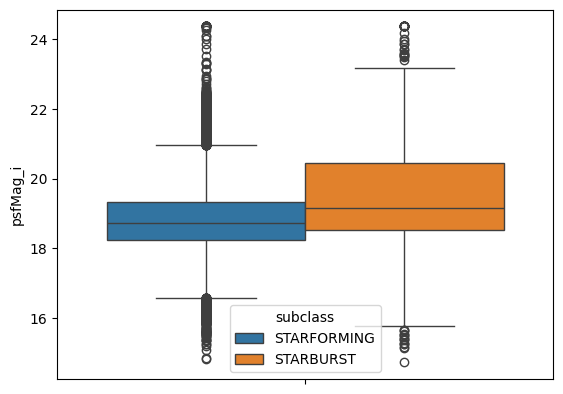

psfMag_z


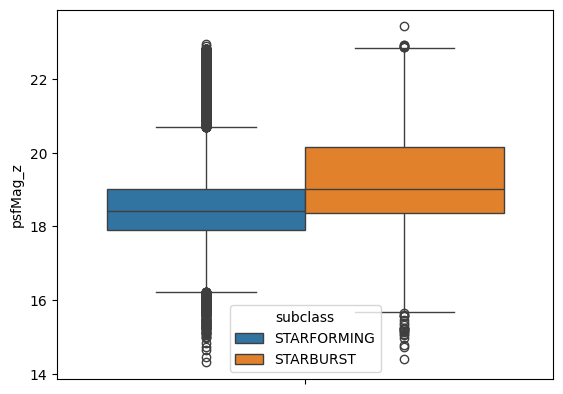

expAB_u


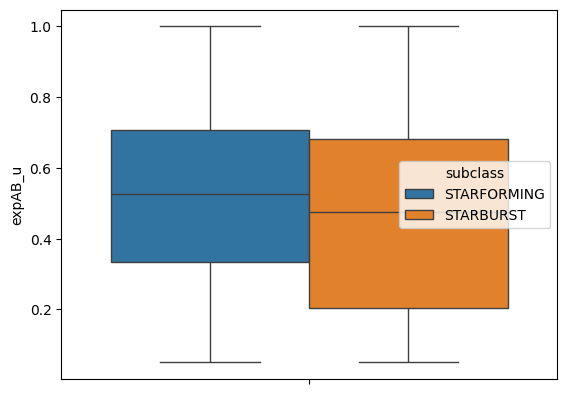

expAB_g


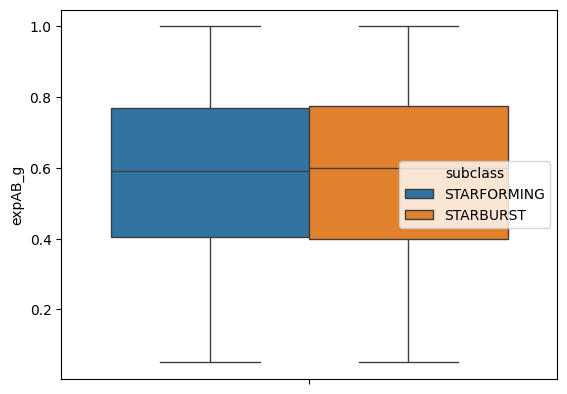

expAB_r


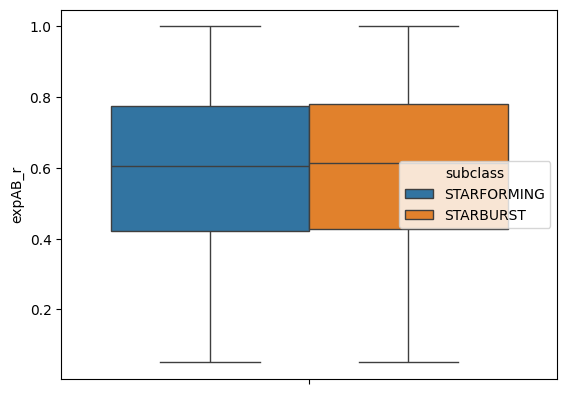

expAB_i


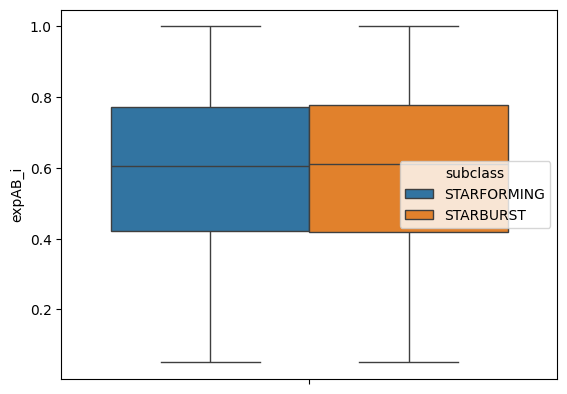

expAB_z


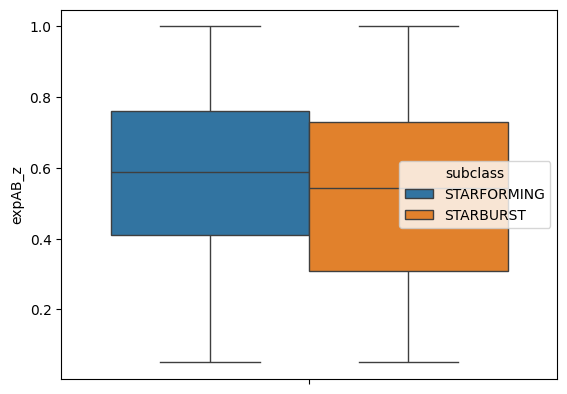

redshift


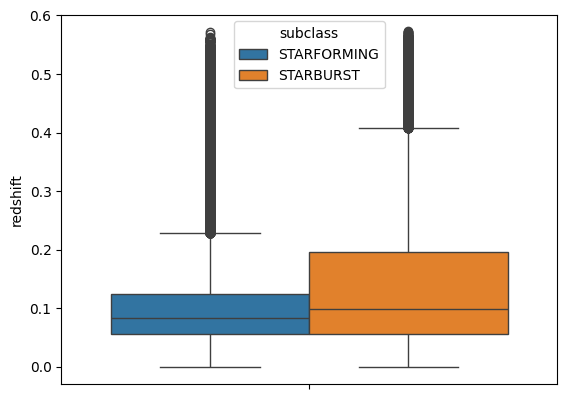

redshift_err


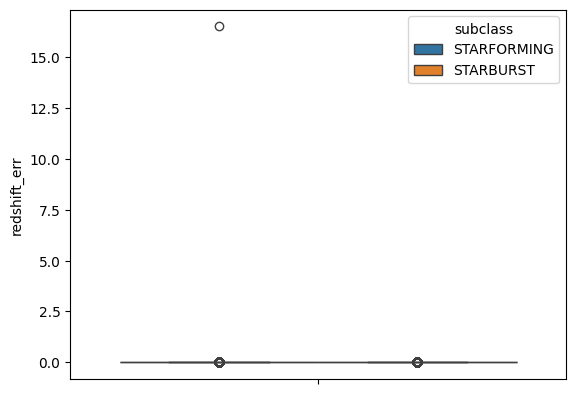

In [21]:
%matplotlib inline

for col_index, column in enumerate(galaxy_data.columns):
    if column == 'subclass':
        continue

    plot = sb.boxplot(
        data=galaxy_data,
        y=column,
        hue="subclass"
    )
    print(column)
    plt.show()

Valores muito elevados na coluna ```redshift_err``` fazem duvidar da fiabilidade dos valores das linhas em causa. Assim sendo, eliminemos as linhas em que o valor na referida coluna seja superior a 1.

In [31]:
print(f"Total linhas antes:{len(galaxy_data)}")
galaxy_data = galaxy_data[galaxy_data['redshift_err'] <= 1]
print(f"Total linhas depois:{len(galaxy_data)}")

Total linhas antes:97478
Total linhas depois:97477


Ainda, observamos o total relativo de ocorrências de cada subclasse:

In [35]:
print(galaxy_data['subclass'].value_counts(normalize=True))

subclass
STARFORMING    0.754198
STARBURST      0.245802
Name: proportion, dtype: float64


Como se pode ver, há um grande desequilíbrio entre as ocorrências das duas sub-classes. Tal deverá ser tido em conta na escolha de conjuntos de treino na hora de treinar o modelo de classificação.

In [37]:
galaxy_data.to_csv("clean_data.csv", index=False)